In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import scipy.stats as stats

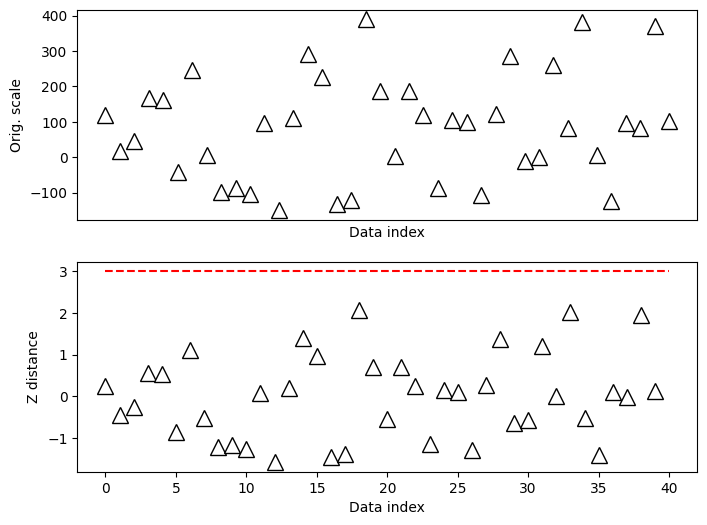

In [2]:
# create some data

N = 40
data = np.random.randn(N)
data[data<-1] = data[data<-1] + 2
data[data>2] = data[data>2]**2  # try to force a few outliers
data = data*200 + 50    # change the scale for comparison with z

# convert to z
dataZ = (data - np.mean(data)) / np.std(data)

# specify the z-score threshold
zscorethresh = 3

# plot the data
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# plot the zscores
ax[1].plot(dataZ, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

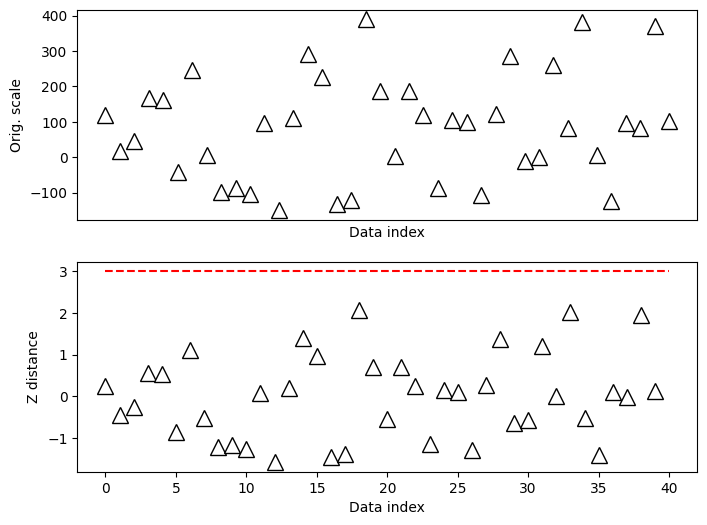

In [3]:
# identify outliers

outliers = np.where(abs(dataZ) > zscorethresh)[0]

# cross those out
ax[0].plot(outliers, data[outliers], 'x', color='r', markersize=20)
ax[1].plot(outliers, dataZ[outliers], 'x', color='r', markersize=20)

fig

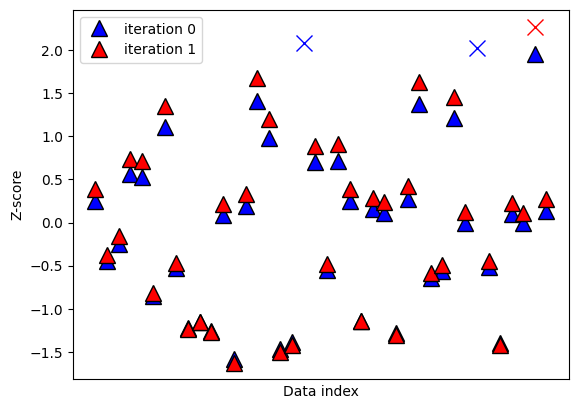

[18 33 38]


In [4]:
## iterative method

# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data,ddof=1)


colorz = 'brkm'
numiters = 0 # iteration counter
while True:
    
    # convert to z
    datamean = np.nanmean(dataZ)
    datastd  = np.nanstd(dataZ)
    dataZ = (dataZ-datamean) / datastd
    
    # find data values to remove
    toremove = dataZ>zscorethresh
    
    # break out of while loop if no points to remove
    if sum(toremove)==0:
        break
    else:
        # otherwise, mark the outliers in the plot
        plt.plot(np.where(toremove)[0],dataZ[toremove],'%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan
    
    # replot
    plt.plot(dataZ,'k^',markersize=12,markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()

#### the data points to be removed
removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

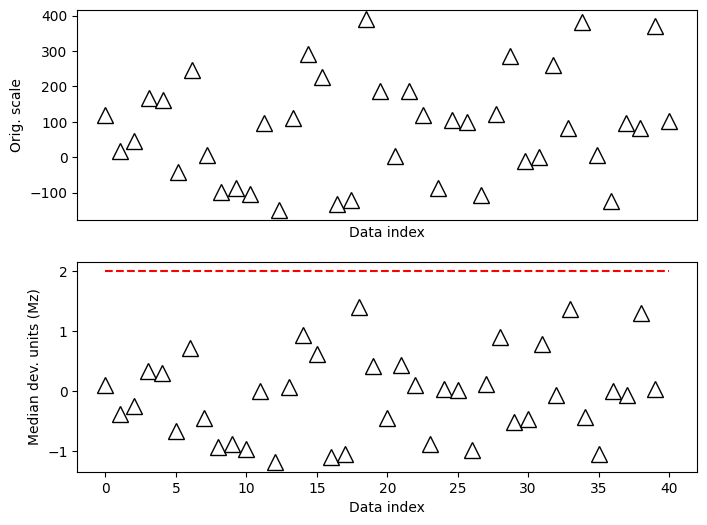

In [5]:
## modified Z for non-normal distributions

# compute modified z
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed) / dataMAD


# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()